In [1]:
# # In case it is necessary to run in colaboratory
# !python colab_module_imports.py

In [2]:
from revllm.preprocess_distilbert import PreprocessQAndA
from revllm.analyze_distilbert import AnalyzeQAndA 
from revllm.visualize_distilbert import VisualizeQAndA

# Question and Answer, or "qanda"
* DistilBERT base model
* fine-tuned on SQuAD, a standard question answering dataset

## The user provides:

* A question
* A context, from which the model will extract the answer
* A ground truth answer, which is what the model will try to predict

In [3]:
question = "What is the name of the virus?"
context = "The name of the virus is COVID-19."
ground_truth = "COVID-19"

# We use the same model as the huggingface baseline for qanda
model = 'distilbert-base-uncased-distilled-squad'

In [4]:
#Define the objects
preprocessor = PreprocessQAndA(model)
analyzer = AnalyzeQAndA(model,preprocessor)
visualizer = VisualizeQAndA(model,preprocessor)

In [5]:
# Pass the question, context and ground truth to the preprocessor
preprocessor(question, context, ground_truth)

## .predict() method
* Two predictions are made:
    * A predicted start to the answer (token number)
    * A predicted end to the answer (token number)
* The predicted answer as shown is the text between the predicted start and end tokens

In [6]:
# Run the model
analyzer.predict()

        Question:  What is the name of the virus?
Predicted Answer:  co ##vid - 19
   Actual Answer:  COVID-19


In [7]:
analyzer.start_scores.max(1).values

tensor([9.5634], grad_fn=<MaxBackward0>)

## "lig" methods
* "lig" is a reference to the internal method used, "layer integrated gradients"

### .lig_color_map() method
* Since the prediction consists of a start and end token, for each one here is shown:
    * The predicted vs actual token
    * The entire text is printed with question and context concatenated.  
        * Above the text for each token, its importance to model's prediction ("attribution score") is shown in color.  
        * A legend is included.

In [8]:
analyzer.lig_color_map()

 Visualizations For Start Position 


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
16,16 (1.00),16,2.92,[CLS] what is the name of the virus ? [SEP] the name of the virus is co ##vid - 19 . [SEP]


 Visualizations For End Position 


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
19,19 (0.98),19,3.02,[CLS] what is the name of the virus ? [SEP] the name of the virus is co ##vid - 19 . [SEP]


### .lig_top_k_tokens() method
* Prints the entire list of tokens
* For each of the start and end token predictions, prints the top k attributed tokens, for a choice of k.

In [9]:
analyzer.lig_top_k_tokens(k=5)

Full token list: ['[CLS](0)', 'what(1)', 'is(2)', 'the(3)', 'name(4)', 'of(5)', 'the(6)', 'virus(7)', '?(8)', '[SEP](9)', 'the(10)', 'name(11)', 'of(12)', 'the(13)', 'virus(14)', 'is(15)', 'co(16)', '##vid(17)', '-(18)', '19(19)', '.(20)', '[SEP](21)']
Top 5 attributed embeddings for start position:   Word(Index), Attribution
0            19 (19), 0.54
1             - (18), 0.43
2            co (16), 0.33
3          name (11), 0.32
4             . (20), 0.28
Top 5 attributed embeddings for end position:   Word(Index), Attribution
0             . (20), 0.59
1            19 (19), 0.46
2          name (11), 0.38
3             the (3), 0.3
4           the (10), 0.23


## "lc" methods
* "lc" is a reference to the internal method used, "layer conductance"

### .lc_visualize_layers() method
* Creates 2 plots: one for the predicting start token, one for the predicting end token
* For each token, a color tile representing the attribution score is given for each layer of the model (there are 6 layers in distilbert).

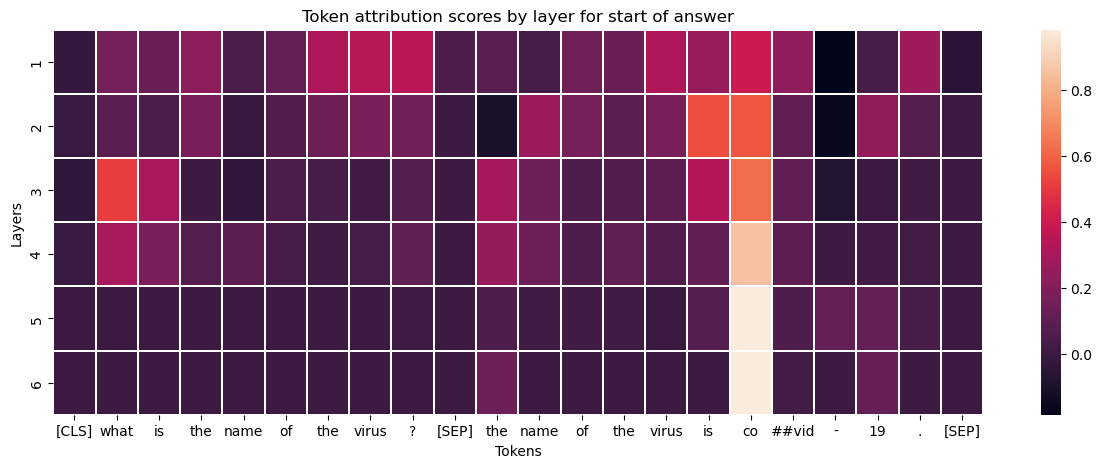

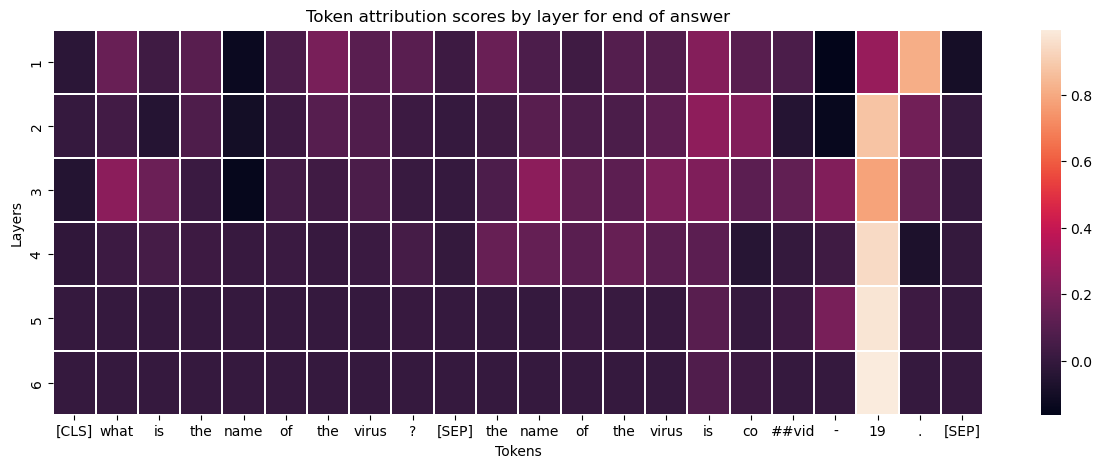

In [10]:
visualizer.lc_visualize_layers()

### .lc_visualize_token() method
* For a choice of token (for example "name"), produces some plots.
* This method is unfinished, an explanation to come.

In [ ]:
visualizer.lc_visualize_token_boxes('name')

The token name occurs at indices: [4, 11]


Please select an index from the list above:  1


Invalid choice. Please choose an index from [4, 11]
The token name occurs at indices: [4, 11]


Please select an index from the list above:  2


Invalid choice. Please choose an index from [4, 11]
The token name occurs at indices: [4, 11]


Please select an index from the list above:  1


Invalid choice. Please choose an index from [4, 11]
The token name occurs at indices: [4, 11]


Please select an index from the list above:  3


Invalid choice. Please choose an index from [4, 11]
The token name occurs at indices: [4, 11]


In [ ]:
visualizer.lc_visualize_token_pdfs('name')

In [ ]:
visualizer.lc_visualize_token_entropies('name')